In [108]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
import time

In [109]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [110]:
coordinates = list(lat_lngs)

In [ ]:
# Use the tuple() function to display the latitude and longitude combinations.
#for coordinate in coordinates:
    #print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          #citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

In [111]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [ ]:
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

# Build the basic URL for the OpenWeatherMap with your weather_api_key added to the URL.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

In [56]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


Beginning Data Retrieval     
-----------------------------


In [71]:
# Loop Through the List of Cities and Build the City URL
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
        # Loop through all the cities in the list.
        for i, city in enumerate(cities):

            # Group cities in sets of 50 for logging purposes.
            if (i % 50 == 0 and i >= 50):
                set_count += 1
                record_count = 1
    
                # Create endpoint URL with each city.
                city_url = url + "&q=" + city.replace(" ","+")

                # Log the URL, record, and set numbers and the city.
                print(f"Processing Record {record_count} of Set {set_count} | {city}")
                # Add 1 to the record count.
                record_count += 1
    
                # Run an API request for each of the cities.
                try:
                    # Parse the JSON and retrieve data.
                    city_weather = requests.get(city_url).json()
                    # Parse out the needed data.
                    city_lat = city_weather["coord"]["lat"]
                    city_lng = city_weather["coord"]["lon"]
                    city_max_temp = city_weather["main"]["temp_max"]
                    city_humidity = city_weather["main"]["humidity"]
                    city_clouds = city_weather["clouds"]["all"]
                    city_wind = city_weather["wind"]["speed"]
                    city_country = city_weather["sys"]["country"]
                    # Convert the date to ISO standard.
                    city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
                    # Append the city information into city_data list.
                    city_data.append({"City": city.title(),
                                            "Lat": city_lat,
                                        "Lng": city_lng,
                                        "Max Temp": city_max_temp,
                                        "Humidity": city_humidity,
                                        "Cloudiness": city_clouds,
                                        "Wind Speed": city_wind,
                                        "Country": city_country,
                                        "Date": city_date})

                # If an error is experienced, skip the city.
                except:
                    print("City not found. Skipping...")
                    pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
# Create endpoint URL with each city.
city_url = url + "&q=" + cities[i]        

Processing Record 1 of Set 531 | mailsi
Processing Record 1 of Set 532 | longonjo
Processing Record 1 of Set 533 | izhma
Processing Record 1 of Set 534 | mutoko
Processing Record 1 of Set 535 | seagoville
Processing Record 1 of Set 536 | bolsheustikinskoye
City not found. Skipping...
Processing Record 1 of Set 537 | praya
Processing Record 1 of Set 538 | san patricio
Processing Record 1 of Set 539 | verkhnyaya toyma
Processing Record 1 of Set 540 | khani
Processing Record 1 of Set 541 | axim
Processing Record 1 of Set 543 | mailsi
Processing Record 1 of Set 544 | longonjo
Processing Record 1 of Set 545 | izhma
Processing Record 1 of Set 546 | mutoko
Processing Record 1 of Set 547 | seagoville
Processing Record 1 of Set 548 | bolsheustikinskoye
City not found. Skipping...
Processing Record 1 of Set 549 | praya
Processing Record 1 of Set 550 | san patricio
Processing Record 1 of Set 551 | verkhnyaya toyma
Processing Record 1 of Set 552 | khani
Processing Record 1 of Set 553 | axim
Proces

In [107]:
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a8623c144707f945ad14d2f8e1a5cf11&q=port lincoln


In [104]:
len(city_data)

550

In [75]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mailsi,29.8003,72.1758,76.28,12,0,3.31,PK,2021-10-16 18:44:34
1,Longonjo,-12.9067,15.2533,71.76,50,28,4.79,AO,2021-10-16 18:48:20
2,Izhma,65.0083,53.9113,38.77,96,100,9.86,RU,2021-10-16 18:48:21
3,Mutoko,-17.3970,32.2268,76.69,32,76,2.89,ZW,2021-10-16 18:48:21
4,Seagoville,32.6396,-96.5383,74.14,29,1,9.22,US,2021-10-16 18:48:21
5,Praya,14.9215,-23.5087,84.74,65,0,6.91,CV,2021-10-16 18:48:22
6,San Patricio,28.0170,-97.5169,75.61,36,54,14.74,US,2021-10-16 18:48:22
7,Verkhnyaya Toyma,62.2349,44.9985,43.12,88,100,7.83,RU,2021-10-16 18:48:22
8,Khani,41.9563,42.9566,49.57,80,6,3.80,GE,2021-10-16 18:48:23
9,Axim,4.8699,-2.2405,79.70,84,5,8.41,GH,2021-10-16 18:48:23


In [78]:
# df = df[new_column_order]
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mailsi,PK,2021-10-16 18:44:34,29.8003,72.1758,76.28,12,0,3.31
1,Longonjo,AO,2021-10-16 18:48:20,-12.9067,15.2533,71.76,50,28,4.79
2,Izhma,RU,2021-10-16 18:48:21,65.0083,53.9113,38.77,96,100,9.86
3,Mutoko,ZW,2021-10-16 18:48:21,-17.3970,32.2268,76.69,32,76,2.89
4,Seagoville,US,2021-10-16 18:48:21,32.6396,-96.5383,74.14,29,1,9.22
...,...,...,...,...,...,...,...,...,...
545,Praya,CV,2021-10-16 18:48:04,14.9215,-23.5087,84.74,65,0,6.91
546,San Patricio,US,2021-10-16 18:48:24,28.0170,-97.5169,75.61,36,54,14.74
547,Verkhnyaya Toyma,RU,2021-10-16 18:48:24,62.2349,44.9985,43.12,88,100,7.83
548,Khani,GE,2021-10-16 18:48:23,41.9563,42.9566,49.57,80,6,3.80


In [84]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [85]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [88]:
# Get today's date in seconds.
today = time.time()
today


1634429129.2706392

In [90]:
today = time.strftime("%x")
today

'10/16/21'

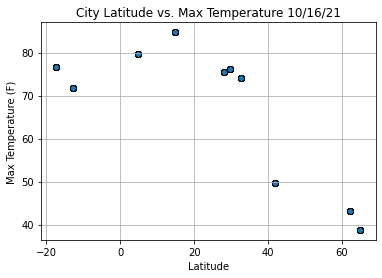

In [91]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

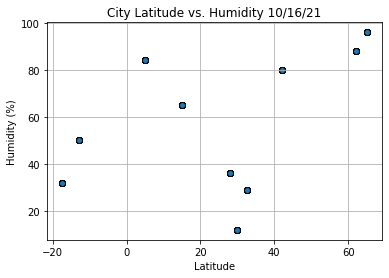

In [87]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

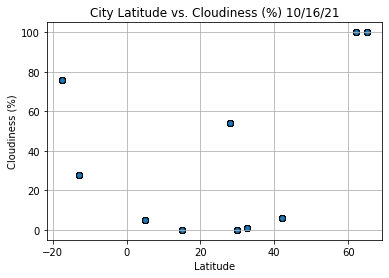

In [92]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

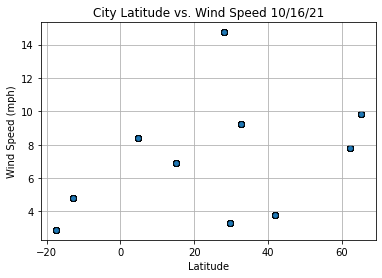

In [93]:
# 6.3.4 Plot Latitude vs. Wind Speed

# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [94]:
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [103]:
# We have an algorithm that performs the linear regression; returns the equation of the regression line, and correlation coefficient, and p value; and adds the regression line to a scatter plot of city weather data. Below, the code looks like what we have used before.

x_values = lats
y_values = temps

# Import linregress
from scipy.stats import linregress
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

TypeError: can't multiply sequence by non-int of type 'numpy.float64'

In [98]:
# In our function, we have four parameters: x_values, y_values, y_label, and text_coordinates, and we will add a fifth parameter for the title, called, title. Now, add the algorithm we use to perform the linear regression underneath the function. Our function should look like the following.

# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    
# If we run this code there will be no output until we call the function with five parameters.


In [99]:
# Let's apply this method to our city_data_df DataFrame by adding the code index13 = city_data_df.loc[13] in a cell and running the cell. The output will present all the information at index 13 of the city_data_df DataFrame. Note that you may see a different city in your output cell than the one shown in the following image.

index13 = city_data_df.loc[13]


In [100]:
# We can also filter a DataFrame based on a value of a row. For instance, if we wanted to get all Northern Hemisphere latitudes, for latitudes greater than or equal to 0, we can filter the city_data_df DataFrame using the code city_data_df["Lat"] >= 0. Executing this code will return either "True" or "False" for all the rows that meet these criteria.

city_data_df["Lat"] >= 0

0       True
1      False
2       True
3      False
4       True
       ...  
545     True
546     True
547     True
548     True
549     True
Name: Lat, Length: 550, dtype: bool

In [101]:
# If we want to return a DataFrame with all data fitting the criteria, for latitudes greater than or equal to 0, we can use the loc method on the city_data_df DataFrame. Inside the brackets, we would add the conditional filter city_data_df["Lat"] >= 0 so that our statement would appear as:

city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mailsi,PK,2021-10-16 18:44:34,29.8003,72.1758,76.28,12,0,3.31
2,Izhma,RU,2021-10-16 18:48:21,65.0083,53.9113,38.77,96,100,9.86
4,Seagoville,US,2021-10-16 18:48:21,32.6396,-96.5383,74.14,29,1,9.22
5,Praya,CV,2021-10-16 18:48:22,14.9215,-23.5087,84.74,65,0,6.91
6,San Patricio,US,2021-10-16 18:48:22,28.0170,-97.5169,75.61,36,54,14.74
...,...,...,...,...,...,...,...,...,...
545,Praya,CV,2021-10-16 18:48:04,14.9215,-23.5087,84.74,65,0,6.91
546,San Patricio,US,2021-10-16 18:48:24,28.0170,-97.5169,75.61,36,54,14.74
547,Verkhnyaya Toyma,RU,2021-10-16 18:48:24,62.2349,44.9985,43.12,88,100,7.83
548,Khani,GE,2021-10-16 18:48:23,41.9563,42.9566,49.57,80,6,3.80


In [102]:
# Also, since this is a DataFrame, we can add the head() method at the end to get the first five rows, not counting the row of column headings.

city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mailsi,PK,2021-10-16 18:44:34,29.8003,72.1758,76.28,12,0,3.31
2,Izhma,RU,2021-10-16 18:48:21,65.0083,53.9113,38.77,96,100,9.86
4,Seagoville,US,2021-10-16 18:48:21,32.6396,-96.5383,74.14,29,1,9.22
5,Praya,CV,2021-10-16 18:48:22,14.9215,-23.5087,84.74,65,0,6.91
6,San Patricio,US,2021-10-16 18:48:22,28.0170,-97.5169,75.61,36,54,14.74


In [ ]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [ ]:
# 6.4.3 Find the Correlation Between Latitude and Percent Humidity
